## Exploratory Data Analysis of Parkinson Disease Progression Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

In [2]:
# Import the dataset
train_clinical = pd.read_csv("/Users/sukhpreetsahota/Downloads/train_clinical_data.csv")
train_peptides = pd.read_csv("/Users/sukhpreetsahota/Downloads/train_peptides.csv")
train_proteins = pd.read_csv("/Users/sukhpreetsahota/Downloads/train_proteins.csv")

## train clinical dataset

The train_clinical sample includes 248 patients; For the dataset, we have 2615 rows and 8 columns

In [3]:
train_clinical.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [4]:
# check for the number of unique values
print(f"The number of unique visit month is: {train_clinical['visit_month'].nunique()}")
# print each unique value
print(pd.unique(train_clinical["visit_month"]))

The number of unique visit month is: 17
[  0   3   6   9  12  18  24  30  36  42  48  54  60  72  84  96 108]


In [5]:
# check for the number of unique values
train_clinical["patient_id"].nunique()

248

In [6]:
train_clinical.shape

(2615, 8)

### Missing values check

According to the distribution graph, we can see that most of the missing values centered as the variable of "upd23b_clinical_state_on_medication", which explains wheyhrt ot not the patient was taking medication.

updrs_4 also contains a lot of missing values, which account for motor complications in the Parkinson Disease

In [7]:
# Check for missing values
train_clinical.isnull().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

In [8]:
# Count the number of missing values per variable
missing_count = train_clinical.isnull().sum()

# Create a dataframe with the variable names and null counts
missing_count_df = pd.DataFrame({'variable': missing_count.index, 'missing_count': missing_count.values})

# Plot the distribution of missing values per variable
bars = alt.Chart(missing_count_df).mark_bar().encode(
    x=alt.X('variable:O', axis=alt.Axis(title='Variable')),
    y=alt.Y('null_count:Q', axis=alt.Axis(title='Number of Missing Values')),
    tooltip=[alt.Tooltip('variable:O', title='Variable'), alt.Tooltip('missing_count:Q', title='Missing Count')]
).properties(
    width=500,
    height=300
)

# Show the plot
bars.configure_title(fontSize=20).configure_axis(labelFontSize=15, titleFontSize=15)

alt.Chart(...)

### Summary stats

For visit_month, we can see that the maximum number of visiting month is 108;

For updrs_1, we have a mean values of 7.11 and maximum value of 33

For updrs_2, we have a mean values of 6.74 and maximum value of 40

For updrs_3, we have a mean values of 19.42 and maximum value of 86

For updrs_4, we have a mean values of 1.86 and maximum value of 20

Therefore, patients score higher in updrs part 3. While looking at the distribution graph of each updrs score, all of the are right skewed.

For upd23b_clinical_state_on_medication, a slightly higher amount of patients are taking medication. The difference is not large.

In [9]:
variables = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

train_clinical[variables].describe().T


,count,mean,std,min,25%,50%,75%,max
visit_month,2615.0,31.190822,25.199053,0.0,10.5,24.0,48.0,108.0
updrs_1,2614.0,7.110559,5.525955,0.0,3.0,6.0,10.0,33.0
updrs_2,2613.0,6.743590,6.323230,0.0,1.0,5.0,10.0,40.0
updrs_3,2590.0,19.421236,15.000289,0.0,6.0,19.0,29.0,86.0
updrs_4,1577.0,1.861763,3.022112,0.0,0.0,0.0,3.0,20.0


In [10]:
# Boxplot for the whole dataset

train_clinical_ = train_clinical.dropna()
# Create the boxplot
x = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

alt.Chart(train_clinical).mark_boxplot().encode(
    y=alt.Y('variable:O', axis=alt.Axis(title='UPDRS Score Type')),
    x=alt.X('value:Q', title="Score"),
    color=alt.Color('variable:O', legend=None),
).transform_fold(
    x,
    as_=['variable', 'value']
).transform_filter(
    alt.FieldOneOfPredicate(field='variable', oneOf=x)
).properties(
    width=500,
    height=300,
    title='Boxplot of UPDRS Score'
)

alt.Chart(...)

In [11]:
# Boxplot for patients who is taking medication
On_data = train_clinical[train_clinical["upd23b_clinical_state_on_medication"]=="On"]

# drop missing values
On_data_ = On_data.dropna()

# Boxplot for the whole dataset
x = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

alt.Chart(On_data_).mark_boxplot().encode(
    y=alt.Y('variable:O', axis=alt.Axis(title='UPDRS Score Type')),
    x=alt.X('value:Q', title="Score"),
    color=alt.Color('variable:O', legend=None),
).transform_fold(
    x,
    as_=['variable', 'value']
).transform_filter(
    alt.FieldOneOfPredicate(field='variable', oneOf=x)
).properties(
    width=500,
    height=300,
    title='Boxplot of UPDRS Score while ON Medication'
)

alt.Chart(...)

In [12]:
# Boxplot for patients who is taking medication
Off_data = train_clinical[train_clinical["upd23b_clinical_state_on_medication"]=="Off"]

# drop missing values
Off_data_ = Off_data.dropna()

# Boxplot for the whole dataset
x = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

alt.Chart(Off_data_).mark_boxplot().encode(
    y=alt.Y('variable:O', axis=alt.Axis(title='UPDRS Score Type')),
    x=alt.X('value:Q', title="Score"),
    color=alt.Color('variable:O', legend=None),
).transform_fold(
    x,
    as_=['variable', 'value']
).transform_filter(
    alt.FieldOneOfPredicate(field='variable', oneOf=x)
).properties(
    width=500,
    height=300,
    title='Boxplot of UPDRS Score while OFF Medication'
)

alt.Chart(...)

In [13]:
# Getting the number of times the patient_id appears, so we will know how many months the patient progress

patient_counts = train_clinical['patient_id'].value_counts().tolist()
visiting_month = []

for i in range(len(patient_counts)):
    if patient_counts[i] == 1:
        visiting_month.append(0)
    elif patient_counts[i] == 2:
        visiting_month.append(3)
    elif patient_counts[i] == 3:
        visiting_month.append(6)
    elif patient_counts[i] == 4:
        visiting_month.append(9)
    elif patient_counts[i] == 5:
        visiting_month.append(12)
    elif patient_counts[i] == 6:
        visiting_month.append(18)
    elif patient_counts[i] == 7:
        visiting_month.append(24)
    elif patient_counts[i] == 8:
        visiting_month.append(30)
    elif patient_counts[i] == 9:
        visiting_month.append(36)
    elif patient_counts[i] == 10:
        visiting_month.append(42)
    elif patient_counts[i] == 11:
        visiting_month.append(48)
    elif patient_counts[i] == 12:
        visiting_month.append(54)
    elif patient_counts[i] == 13:   
        visiting_month.append(60)
    elif patient_counts[i] == 14:   
        visiting_month.append(72)
    elif patient_counts[i] == 15:   
        visiting_month.append(84)
    elif patient_counts[i] == 16:   
        visiting_month.append(96)
    elif patient_counts[i] == 17:   
        visiting_month.append(108)


In [14]:
# Transfer a list object to dataframe
df_visit_month = pd.DataFrame(visiting_month, columns=['visit_month'])

In [15]:
df_visit_month.value_counts()

visit_month
24             35
36             31
84             28
30             25
96             24
18             19
60             17
42             16
72             16
54             14
48              9
12              8
108             3
6               2
9               1
dtype: int64

In [23]:
# Create an Altair chart object
chart = alt.Chart(df_visit_month).mark_bar().encode(
    x=alt.X('visit_month:O', title="Visit Month (Relative to Patient's First Visit)"),
    y=alt.Y('count()', title="Number of Patients")
)

# Customize the chart
chart = chart.properties(
    title={
        'text': 'Distribution of Clinical Visits by Patient (How Long Patients Have Been A Part of Clinical Study)',
        'fontSize': 18,
        'fontWeight': 'bold'
    },
    width=600,
    height=400
)

# Display the chart
chart

alt.Chart(...)

In [24]:
import altair as alt

# Create an Altair chart object
chart = alt.Chart(train_clinical).mark_bar().encode(
    x=alt.X('updrs_1:O', bin=True, title="UPDRS 1 Scores"),
    y=alt.Y('count()', title = "Number of Patient Visits"),
)

# Customize the chart
chart = chart.properties(
    title={
        'text': 'Distribution of UPDRS 1 Scores',
        'fontSize': 18,
        'fontWeight': 'bold'
    },
    width=600,
    height=400
)

# Display the chart
chart

alt.Chart(...)

In [25]:
# Create an Altair chart object
chart = alt.Chart(train_clinical).mark_bar().encode(
    x=alt.X('updrs_2:O', bin=True, title="UPDRS 2 Scores"),
    y=alt.Y('count()', title = "Number of Patient Visits"),
)

# Customize the chart
chart = chart.properties(
    title={
        'text': 'Distribution of UPDRS 2 Scores',
        'fontSize': 18,
        'fontWeight': 'bold'
    },
    width=600,
    height=400
)

# Display the chart
chart

alt.Chart(...)

In [26]:
# Create an Altair chart object
chart = alt.Chart(train_clinical).mark_bar().encode(
    x=alt.X('updrs_3:O', bin=True, title="UPDRS 3 Scores"),
    y=alt.Y('count()', title = "Number of Patient Visits"),
)

# Customize the chart
chart = chart.properties(
    title={
        'text': 'Distribution of UPDRS 3 Scores',
        'fontSize': 18,
        'fontWeight': 'bold'
    },
    width=600,
    height=400
)

# Display the chart
chart

alt.Chart(...)

In [27]:
# Create an Altair chart object
chart = alt.Chart(train_clinical).mark_bar().encode(
    x=alt.X('updrs_4:O', bin=True, title="UPDRS 4 Scores"),
    y=alt.Y('count()', title = "Number of Patient Visits"),
)

# Customize the chart
chart = chart.properties(
    title={
        'text': 'Distribution of UPDRS 4 Scores',
        'fontSize': 18,
        'fontWeight': 'bold'
    },
    width=600,
    height=400
)

# Display the chart
chart

alt.Chart(...)

In [28]:
# Create an Altair chart object
chart = alt.Chart(train_clinical).mark_bar().encode(
    x=alt.X('upd23b_clinical_state_on_medication:O', bin=False, title="Patient Medication Status"),
    y=alt.Y('count()', title = "Number of Patient Visits"),
)

# Customize the chart
chart = chart.properties(
    title={
        'text': 'Distribution of Patient Medication Status',
        'fontSize': 18,
        'fontWeight': 'bold'
    },
    width=600,
    height=400
)

# Display the chart
chart

alt.Chart(...)

### Correlation map

According to the correlation matrix, we can see that updrs_2 and updrs_3 have moderate positive correlation, which is about 0.74;
updrs_2 also have moderate positive correlation with updrs_1, which is about 0.66

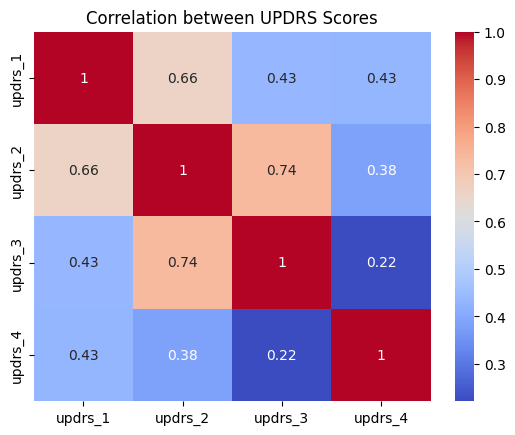

In [29]:
# Calculate the correlation matrix
udprs_score = train_clinical[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]
corr_matrix = udprs_score.corr()

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add title and show the plot
plt.title('Correlation between UPDRS Scores')
plt.show()


### Visit_month vs each UPDRS score

We want to see how does time progression has the relationship with each UPDRS score while adjusting for the medication, so I draw a barplot with mean line plot to 
provide a sense of it.

While the patient is taking the medication, the trend lines are pretty flat for UPDRS Parts 1, 2, and 4. However, for part 3, it shows a slight increase trend, which indicate a time progression.

While the patient is not taking the medication, the trend lines are increasing for all UPDRS Parts, 1, 2, 3, and 4, which are all responsible for time progression.


In [55]:
# Filter the data for only ON medication
On_data = train_clinical[train_clinical["upd23b_clinical_state_on_medication"]=="On"]

# Define the chart object
base = alt.Chart(On_data).properties(
    width=600,
    height=400
)

# Loop through each UPDRS feature and create a box plot and mean line plot
charts = []
for i, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    if i == 0:
        # Create the box plot
        box_plot = base.mark_boxplot().encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(feature, title='Score', scale=alt.Scale(zero=False, padding=1))
            ).properties(
                title={"text": f"UPDRS 1 Scores by Month while ON Medication", "fontSize": 15},
        )
    
        # Create the mean line plot
        mean_line = base.mark_line(color='red', strokeDash=[5, 5]).encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(f"mean({feature})", scale=alt.Scale(zero=False, padding=1))
        )
    elif i == 1:
        # Create the box plot
        box_plot = base.mark_boxplot().encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(feature, title='Score', scale=alt.Scale(zero=False, padding=1))
            ).properties(
                title={"text": f"UPDRS 2 Scores by Month while ON Medication", "fontSize": 15},
        )
    
        # Create the mean line plot
        mean_line = base.mark_line(color='red', strokeDash=[5, 5]).encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(f"mean({feature})", scale=alt.Scale(zero=False, padding=1))
        )
    elif i == 2:
        # Create the box plot
        box_plot = base.mark_boxplot().encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(feature, title='Score', scale=alt.Scale(zero=False, padding=1))
            ).properties(
                title={"text": f"UPDRS 3 Scores by Month while ON Medication", "fontSize": 15},
        )
    
        # Create the mean line plot
        mean_line = base.mark_line(color='red', strokeDash=[5, 5]).encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(f"mean({feature})", scale=alt.Scale(zero=False, padding=1))
        )
    else:
        # Create the box plot
        box_plot = base.mark_boxplot().encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(feature, title='Score', scale=alt.Scale(zero=False, padding=1))
            ).properties(
                title={"text": f"UPDRS 4 Scores by Month while ON Medication", "fontSize": 15},
        )
    
        # Create the mean line plot
        mean_line = base.mark_line(color='red', strokeDash=[5, 5]).encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(f"mean({feature})", scale=alt.Scale(zero=False, padding=1))
        )
    
    # Combine the plots into one chart
    chart = (box_plot + mean_line).resolve_scale(y='shared')
    
    # Add the chart to the list of charts
    charts.append(chart)
    
# Display the charts
alt.vconcat(*charts)


alt.VConcatChart(...)

In [56]:
# Filter the data for only OFF medication
Off_data = train_clinical[train_clinical["upd23b_clinical_state_on_medication"]=="Off"]

# Define the chart object
base = alt.Chart(Off_data).properties(
    width=600,
    height=400
)

# Loop through each UPDRS feature and create a box plot and mean line plot
charts = []
for i, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    if i == 0:
        # Create the box plot
        box_plot = base.mark_boxplot().encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(feature, title='Score', scale=alt.Scale(zero=False, padding=1))
            ).properties(
                title={"text": f"UPDRS 1 Scores by Month while OFF Medication", "fontSize": 15},
        )
    
        # Create the mean line plot
        mean_line = base.mark_line(color='red', strokeDash=[5, 5]).encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(f"mean({feature})", scale=alt.Scale(zero=False, padding=1))
        )
    elif i == 1:
        # Create the box plot
        box_plot = base.mark_boxplot().encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(feature, title='Score', scale=alt.Scale(zero=False, padding=1))
            ).properties(
                title={"text": f"UPDRS 2 Scores by Month while OFF Medication", "fontSize": 15},
        )
    
        # Create the mean line plot
        mean_line = base.mark_line(color='red', strokeDash=[5, 5]).encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(f"mean({feature})", scale=alt.Scale(zero=False, padding=1))
        )
    elif i == 2:
        # Create the box plot
        box_plot = base.mark_boxplot().encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(feature, title='Score', scale=alt.Scale(zero=False, padding=1))
            ).properties(
                title={"text": f"UPDRS 3 Scores by Month while OFF Medication", "fontSize": 15},
        )
    
        # Create the mean line plot
        mean_line = base.mark_line(color='red', strokeDash=[5, 5]).encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(f"mean({feature})", scale=alt.Scale(zero=False, padding=1))
        )
    else:
        # Create the box plot
        box_plot = base.mark_boxplot().encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(feature, title='Score', scale=alt.Scale(zero=False, padding=1))
            ).properties(
                title={"text": f"UPDRS 4 Scores by Month while OFF Medication", "fontSize": 15},
        )
    
        # Create the mean line plot
        mean_line = base.mark_line(color='red', strokeDash=[5, 5]).encode(
            x=alt.X('visit_month:O', title='Visit Month'),
            y=alt.Y(f"mean({feature})", scale=alt.Scale(zero=False, padding=1))
        )
    
    # Combine the plots into one chart
    chart = (box_plot + mean_line).resolve_scale(y='shared')
    
    # Add the chart to the list of charts
    charts.append(chart)
    
# Display the charts
alt.vconcat(*charts)


alt.VConcatChart(...)

### Visit_month vs Sum of UPDRS score

While summing all the category and patient is not taking the medication, we can see there is a clear increasing trend which shows the disease progression is occuring.

While summing all the category and patient is taking the medication, the trend is not clear before month 72. After 72 months, the disease progression begins.



In [35]:
# create a new variable which sums the updrs
On_data.loc[:, "updrs_sum"] = On_data["updrs_1"] + On_data["updrs_2"] + On_data["updrs_3"] + On_data["updrs_4"]

# Define the chart object
base = alt.Chart(On_data).properties(
    width=600,
    height=400
)

# Create the box plot
box_plot = base.mark_boxplot().encode(
    x=alt.X('visit_month:O', title='Visit Month'),
    y=alt.Y('updrs_sum:Q', title='Score', scale=alt.Scale(zero=False, padding=1))
).properties(
    title={"text": "Total UPDRS Scores by Month while ON Medication", "fontSize": 15},
)

# Create the mean line plot
mean_line = base.mark_line(color='red', strokeDash=[5, 5]).encode(
    x=alt.X('visit_month:O', title='Visit Month'),
    y=alt.Y(f"mean(updrs_sum):Q", scale=alt.Scale(zero=False, padding=1))
)

# Combine the plots into one chart
chart = (box_plot + mean_line).resolve_scale(y='shared')

# Display the charts
chart

/var/folders/m7/m975ymyj3ts3w72r1_lszwjr0000gn/T/ipykernel_50520/492973433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  On_data.loc[:, "updrs_sum"] = On_data["updrs_1"] + On_data["updrs_2"] + On_data["updrs_3"] + On_data["updrs_4"]


alt.LayerChart(...)

In [36]:
# create a new variable which sums the updrs
Off_data.loc[:, "updrs_sum"] = Off_data["updrs_1"] + Off_data["updrs_2"] + Off_data["updrs_3"] + Off_data["updrs_4"]

# Define the chart object
base = alt.Chart(Off_data).properties(
    width=600,
    height=400
)

# Create the box plot
box_plot = base.mark_boxplot().encode(
    x=alt.X('visit_month:O', title='Visit Month'),
    y=alt.Y('updrs_sum:Q', title='Score', scale=alt.Scale(zero=False, padding=1))
).properties(
    title={"text": "Total UPDRS Scores by Month while OFF Medication", "fontSize": 15},
)

# Create the mean line plot
mean_line = base.mark_line(color='red', strokeDash=[5, 5]).encode(
    x=alt.X('visit_month:O', title='Visit Month'),
    y=alt.Y(f"mean(updrs_sum):Q", scale=alt.Scale(zero=False, padding=1))
)

# Combine the plots into one chart
chart = (box_plot + mean_line).resolve_scale(y='shared')

# Display the charts
chart

/var/folders/m7/m975ymyj3ts3w72r1_lszwjr0000gn/T/ipykernel_50520/3218024607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Off_data.loc[:, "updrs_sum"] = Off_data["updrs_1"] + Off_data["updrs_2"] + Off_data["updrs_3"] + Off_data["updrs_4"]


alt.LayerChart(...)

## train_peptides dataset

The train_peptides sample includes 248 patients. The dataset contains 981834 rows and 6 columns.

In [37]:
train_peptides.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [38]:
# check for the number of unique values
print(f"The number of unique visit month is: {train_peptides['visit_month'].nunique()}")
# print each unique value
print(pd.unique(train_peptides["visit_month"]))

The number of unique visit month is: 15
[  0   3   6  12  18  24  30  36  48  54  60  72  84  96 108]


In [39]:
# check for the number of unique values
print(f"The number of unique values of patient_id is: {train_peptides['patient_id'].nunique()}")
print(f"The number of unique values of UniProt is: {train_peptides['UniProt'].nunique()}")
print(f"The number of unique values of Peptide is: {train_peptides['Peptide'].nunique()}")

The number of unique values of patient_id is: 248
The number of unique values of UniProt is: 227
The number of unique values of Peptide is: 968


In [40]:
train_peptides.shape

(981834, 6)

### Missing values check

No missing values for the train_peptides dataset

In [41]:
# Check for missing values
train_peptides.isnull().sum()

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

In [42]:
uniprot_counts_high_pep = train_peptides['UniProt'].value_counts().head(10).to_dict()
uniprot_counts_low_pep = train_peptides['UniProt'].value_counts().sort_values(ascending=True).head(10).to_dict()
print(f'Top 10 most frequent UniProt IDs: {uniprot_counts_high_pep.keys()}')
print(f'Top 10 least frequent UniProt IDs: {uniprot_counts_low_pep.keys()}')

Top 10 most frequent UniProt IDs: dict_keys(['P02787', 'P02768', 'P01024', 'P02751', 'P02649', 'P02774', 'P01009', 'P02647', 'P08603', 'P10909'])
Top 10 least frequent UniProt IDs: dict_keys(['Q99829', 'Q99832', 'Q562R1', 'P01780', 'Q6UX71', 'O75326', 'P06310', 'P19827', 'P36980', 'P02655'])


### Summary stats

The mean value of peptide abundance is about 642890.25; The maximum value is 178752000, and the minimum value is about 11. The variation is very large.

In [43]:
train_peptides[['PeptideAbundance']].describe().T

,count,mean,std,min,25%,50%,75%,max
PeptideAbundance,981834.0,642890.245933,3.377989e+06,10.9985,28174.25,74308.3,221338.75,178752000.0


## train_proteins dataset

The train_proteins sample includes 248 patients. The dataset contains 232741 rows and 5 columns.

In [44]:
train_proteins.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [45]:
# check for the number of unique values
print(f"The number of unique visit month is: {train_proteins['visit_month'].nunique()}")
# print each unique value
print(pd.unique(train_proteins["visit_month"]))

The number of unique visit month is: 15
[  0   3   6  12  18  24  30  36  48  54  60  72  84  96 108]


In [46]:
# check for the number of unique values
print(f"The number of unique values of patient_id is: {train_proteins['patient_id'].nunique()}")
print(f"The number of unique values of UniProt is: {train_proteins['UniProt'].nunique()}")

The number of unique values of patient_id is: 248
The number of unique values of UniProt is: 227


In [47]:
train_proteins.shape

(232741, 5)

### Missing values check

no missing values for the train_proteins dataset

In [48]:
# Check for missing values
train_proteins.isnull().sum()

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

In [49]:
uniprot_counts_high_pep = train_peptides['UniProt'].value_counts().head(10).to_dict()
uniprot_counts_low_pep = train_peptides['UniProt'].value_counts().sort_values(ascending=True).head(10).to_dict()
print(f'Top 10 most frequent UniProt IDs: {uniprot_counts_high_pep.keys()}')
print(f'Top 10 least frequent UniProt IDs: {uniprot_counts_low_pep.keys()}')

Top 10 most frequent UniProt IDs: dict_keys(['P02787', 'P02768', 'P01024', 'P02751', 'P02649', 'P02774', 'P01009', 'P02647', 'P08603', 'P10909'])
Top 10 least frequent UniProt IDs: dict_keys(['Q99829', 'Q99832', 'Q562R1', 'P01780', 'Q6UX71', 'O75326', 'P06310', 'P19827', 'P36980', 'P02655'])


In [50]:
uniprot_counts_high = train_proteins['UniProt'].value_counts().head(10).to_dict()
uniprot_counts_low = train_proteins['UniProt'].value_counts().sort_values(ascending=True).head(10).to_dict()
print(f'Top 10 most frequent UniProt IDs: {uniprot_counts_high.keys()}')
print(f'Top 10 least frequent UniProt IDs: {uniprot_counts_low.keys()}')

Top 10 most frequent UniProt IDs: dict_keys(['P01024', 'P05090', 'P01011', 'P01023', 'Q92520', 'P01042', 'P23142', 'P02790', 'Q9UHG2', 'P01834'])
Top 10 least frequent UniProt IDs: dict_keys(['Q99829', 'Q99832', 'Q562R1', 'P01780', 'Q6UX71', 'O75326', 'P06310', 'P19827', 'P36980', 'P02655'])


### Summary stats

The mean value of Normalized protein expression is 2712077; maximum value is 613851000, and minimum value is 84.6082. The variation is very large and there may be other factors impacting the NPX such as peptide kinds.

In [51]:
train_proteins[['NPX']].describe().T

,count,mean,std,min,25%,50%,75%,max
NPX,232741.0,2.712077e+06,2.224155e+07,84.6082,29464.4,113556.0,563894.0,613851000.0


### Visit month vs NPX

Because the large values and potential variability involved in the expression frequencies, we will use a logarithmic scale to NPX while looking the trend.
The normalized protein expression is pretty stable across months, though the variance is very large.

/var/folders/m7/m975ymyj3ts3w72r1_lszwjr0000gn/T/ipykernel_50520/4204759013.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=train_proteins_copy, x="visit_month", y="log_NPX", color="r", ci=None, linestyles=[":"], ax=ax)


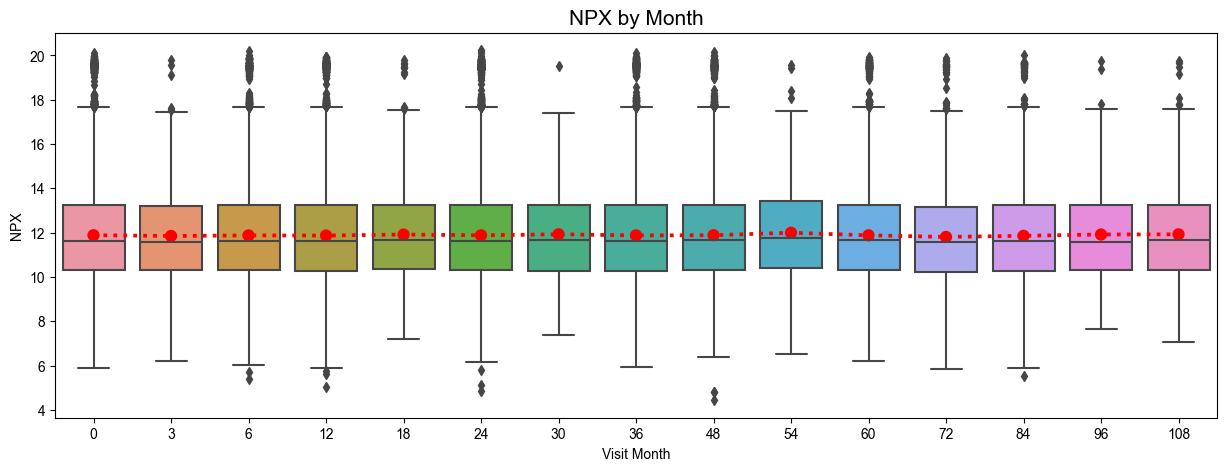

In [52]:
# create a copy of the dataframe
train_proteins_copy = train_proteins.copy()

# calculate the logarithm of NPX
train_proteins_copy["log_NPX"] = np.log(train_proteins_copy["NPX"])

# set up the plot
fig, ax = plt.subplots(figsize=(15, 5))
sns.set_style('darkgrid')

# create the boxplot and pointplot
sns.boxplot(data=train_proteins_copy, x="visit_month", y="log_NPX", ax=ax)
sns.pointplot(data=train_proteins_copy, x="visit_month", y="log_NPX", color="r", ci=None, linestyles=[":"], ax=ax)

# set the plot title and labels
ax.set_title("NPX by Month", fontsize=15)
ax.set_xlabel("Visit Month")
ax.set_ylabel("NPX")

plt.show()